<a href="https://colab.research.google.com/github/love-bees/dataHacker/blob/master/04_RANDN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random numbers and their role in ML

## What are random numbers?

In the previous example, our dataset was created by hand. Often times we assume that the data used in machine learning is generated using some random statistical distribution. Taking this assumption into account, it becomes easy to generate classes of data which contain an arbitrarly large number of elements.

In case you didn't attend any courses in probability, imagine a lotto drum. It's a generator of random (whole) numbers between 1 and 39 (or however it's defined).

The first distribution which will be interesting for us is the uniform distribution. It's often defined on the interval [0, 1], and any number can be generated with equal probability. For uniform distribution we can view equidistant intervals. In case the interval is divided into ten parts, and we generate 1000 numbers of a uniform distribution, we can expect that approximately 100 numbers will be in each interval. Let's check this in Python and get more familliar with using histograms.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Command `rand()` is used to generate elements from a uniform distribution.

In [0]:
x0 = np.random.rand()

In [3]:
print(x0)

0.21578261424206213


With the command `rand()` we can define a whole array of random numbers which are uniformly distributed.

Now we will make an array x_unif which is made up of 1000 random numbers with a uniform distribution:

In [0]:
x_unif = np.random.rand(1000,1)

The array x_unif can now be analyzed with the help of histograms:


Text(0, 0.5, 'Frequency of appearence')

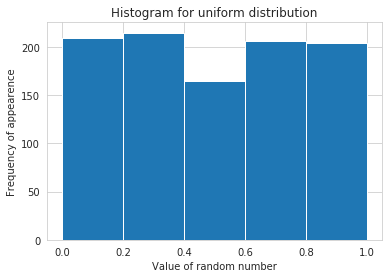

In [7]:
plt.hist(x_unif, bins=5)

plt.title("Histogram for uniform distribution")
plt.xlabel("Value of random number")
plt.ylabel("Frequency of appearence" )

The resulting histogram is divided into 5 intervals (parameter `bins = 5`). We an see that the number of elements in each of the intervals is close to 200. The exact numbers, and the exact limits of these intervals, are written on histogram itself. For example, in the first interval there are around 210 elements, second has around 215, and so on.

The second, and surely the most important distribution, is the Gaussian (normal) distribution. It's a curve which is also located on 10 German marks.

It's defined using two parameters, whose standard values are: 0 - mean value, and 1 - standard deviation (square root of the variance - deviation from the mean value).

Generating a 1D Gaussian distribution is also done using the command randn().

In [0]:
x = np.random.randn(1000,1)

Displaying the distribution with the help of histograms.

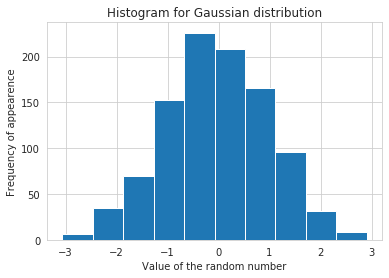

In [9]:
plt.hist(x)
plt.title("Histogram for Gaussian distribution")
plt.xlabel("Value of the random number")
plt.ylabel("Frequency of appearence" );

In the picture we can see an example of a histogram of a gaussian function. We can also see that the probability is much higher near the central part, while the rest of the intervals have smaller and smaller probabilities of appearing.

By simply multiplying the elements of the distribution, we can modify the histogram. In case the number that we're multiplying with is greater than 1, we will get a "wider" distribution, and in case the number is less than 1, we get a "narrower" distribution. Also, in case we add a constant to every number, the distribution can be translated.

Now we can make various 1D Gaussian distributions and store them in coordinates `x1` and `x2`. This way we can define data which resembles circles, or elipses. We professionally call these shapes "blobs".

The next bit of code will show us how we can make two classes of data which come from different distributions. Examples are purposefully made this way so that there's some overlapping. Because of this, our classes won't be linearly separable, because this is a common situation when working with real data (if we can even make a statement like this).

Let's generate two arrays, `x10` and `x11` with random numbers, from which we will make the matrix `X1`.

In [0]:
x10 = np.random.randn(1000, 1)
x11 = np.random.randn(1000, 1) * 2 + 3
X1 = np.hstack ([x10, x11]) #putting the array x11 on top of x10 we get matrix X1 (1000x2) 

In [11]:
X1.shape

(1000, 2)

In the same manner, we generate the matrix X2.


In [0]:
x20 = np.random.randn(1000,1) * 0.8 + 3
x21 = np.random.randn(1000,1) * 1   + 5
X2 =  np.hstack([x20, x21])

Plotting the matrices X1 and X2.


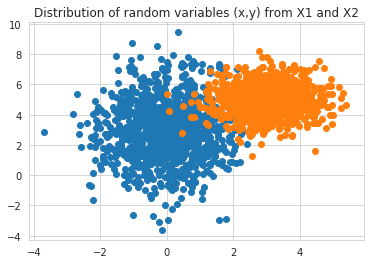

In [13]:
plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.title("Distribution of random variables (x,y) from X1 and X2");

Lastly, we generate a matrix X by vertically combining X1 and X2:


In [0]:
X = np.vstack([X1, X2])

In [0]:
y = np.ones(2000)
y[1000:2000] = 2

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf  = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In the previous part of the code, we used the commands `np.hstack()` and `np.vstack()` which combine two nd-arrays horizontally and vertically. First the arrays `x10` and `x11` have the dimensions 1000 x 1, then they are transformed into a matrix with the dimensions 1000 x 2. After that, the vector X, which we got by combining matrices `X1` and `X2`, was generated and it has 2000 x 2 elements. For this set of 2000 elements we need to define a vector which describes the classes of these elements `y`. Ladtly, we will use the code from blog post #003 where we applied the LDA classifier.

## Training vs test sets

When designing ML (Machine Learning) models, we need to execute an optimization of parameters. This optimization is done on the training set. On the other hand, testing and checking the accuracy of the ML model is done on the test set. Therefore, it's very important that the test set is never used in the training phase. For our previous example, we will create a test set using identical distributions. We will generate 100 more elements from both classes by modifying the previous code a little.

Simply by copying the previous distributions and changing the names of the variables we create a test set. The first 100 elements will belong to class 1, while the last 100 will belong to class 2.

In [0]:
x10_test = np.random.randn(100, 1)
x11_test = np.random.randn(100, 1) * 2 + 3
X1_test  = np.hstack ([x10_test, x11_test])

x20_test = np.random.randn(100,1) * 0.8 + 3
x21_test = np.random.randn(100,1) * 1   + 5
X2_test  = np.hstack([x20_test, x21_test])

X_test = np.vstack([X1_test, X2_test]) # variable X_test will be used for testing
y_test = np.ones(200)
y_test [100:200] = 2

In [0]:
y_predicted = clf.predict(X_test)

Plotting the results of the classification. In case of ideal classification, we would have 100 ones plotted, followed by 100 twos. Variations represent elements which are missclassified.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


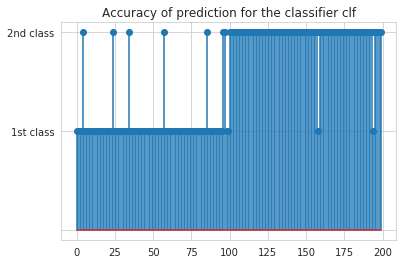

In [24]:
plt.stem(y_predicted)
plt.title('Accuracy of prediction for the classifier clf')
plt.yticks(np.arange(3), ('','1st class', '2nd class'));

Result of the prediction is displayed using the command `stem()`. It clearly shows that from a total of 200 elements, a large number was correctly classified. Only a few elements from class 1 are classified as belonging to class 2. Also, two elements from class 2 are classified like they belong to class 1.

This can be explicitely displayed using the following code. In case we check the equality between the predicted and real values, we will get an array which checks "element by element" and generates an array of elements type boolean. In case the prediction was right, we will have the value True, otherwise we will have False. In this array of 200 boolean elements, we will apply one trick. We will sum them all up. In that case Python will change the data type from boolean to rational/while numbers so that True changes to 1 (logical one) and False into 0 (logical zero). Then, the command `sum()` will display how many elements are correctly classified. When we divide this number with the total number of elements from the test array (200) we will get an accuracy of the classification in percents. The rest of the parameters about the grade of performace of the classifier will be analyzed in the following blog posts.

In [25]:
y_predicted == y_test

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [43]:
print("Accuracy: ", round(sum(y_predicted == y_test)/len(y_test)*100,2),"%")

Accuracy:  95.5 %


## Visualizing linear discriminat function

It would be interesting to see how the coeficients themselves look, the ones calculated by the LDA algorithm.

They are stored in the variables `clf.coef_` and `clf.intercept_`. We can plot the linear function itself, along with the points in the areas around our blogs - discretizing it into a 2D grid and using each of those points as input data for the command `predict()`. The next bit of code will illustrate this.

It's interesting to see how the whole 2D plane gets mapped into classes.

To show this, let's generate a square grid on both axes with steps of 0.5.


In [0]:
x1_fit = np.arange(-5,7,0.5)
x2_fit = np.arange(-5,10,0.5)

Checking the classification of coordinates.

Text(0.5, 1.0, 'Visualization of linear discriminat analysis')

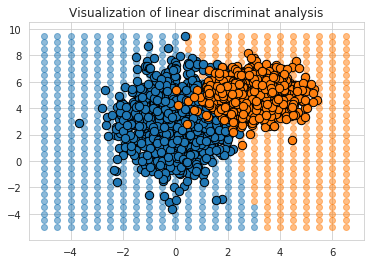

In [81]:
for i in range(len(x1_fit)):
    for j in range(len(x2_fit)):
        temp = np.array([x1_fit[i] , x2_fit[j]])
        temp = temp.reshape(1,-1)
        temp  = clf.predict(temp)
        if (temp ==1):
            plt.scatter(x1_fit[i], x2_fit[j], c='C0', alpha = 0.5)
        else:
            plt.scatter(x1_fit[i], x2_fit[j], c=u'C1', alpha = 0.5)
            
plt.scatter(X1[:,0], X1[:,1], c='C0', edgecolor=u'k', s=70)
plt.scatter(X2[:,0], X2[:,1], c='C1', edgecolor=u'k', s=70)
plt.title("Visualization of linear discriminat analysis")

Using the next commands, we can access the coefficients of the LDA classifier, which we used to plot the linear function itself.

This function is also called a decision function/boundary.

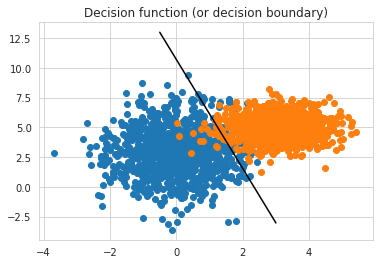

In [83]:
plt.scatter(X[:1000,0], X[:1000,1],c='C0')
plt.scatter(X[1000:,0], X[1000:,1], c='C1')
w = clf.coef_[0]
k = -w[0] / w[1]
xx = np.linspace(-0.5, 3)
yy = k * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')
plt.title("Decision function (or decision boundary)");